#                         Portuguese Banking Instituition

Data Description:

The data is related with direct marketing campaigns of a Portuguese
banking institution. The marketing campaigns were based on phone
calls. Often, more than one contact to the same client was required, in
order to access if the product (bank term deposit) would be ('yes') or not
('no') subscribed.

Domain:

Banking

Context:

Leveraging customer information is paramount for most businesses. In
the case of a bank, attributes of customers like the ones mentioned
below can be crucial in strategizing a marketing campaign when
launching a new product.

# Step 1: Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

import os

# Step 2: Reading the Dataset

In [2]:
#reading the data as data frame
bank_df = pd.read_csv("bank-full.csv")

In [3]:
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Step 3: Exploratory Data Analysis

a.There are 7 Independent variables:

    1.Age(Numeric)
    2.Balance: average yearly balance, in euros (numeric)
    3.Day: last contact day of the month (numeric 1 -31)
    4.Duration: last contact duration, in seconds (numeric).
    5.Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
    6.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    7.previous: number of contacts performed before this campaign and for this client (numeric)

b.There are 8 Ordinal Categorical Variables:

    1.Job : type of job 
    2.Marital : marital status 
    3.Education
    4.Default: has credit in default? (categorical: 'no','yes','unknown')
    5.Housing: has housing loan? (categorical: 'no','yes','unknown')
    6.Loan: has personal loan? (categorical: 'no','yes','unknown')
    7.Contact: contact communication type (categorical:'cellular','telephone')
    8.poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

c.And the target variable is binary category variable(desired target):

    target:has the client subscribed a term deposit? (binary: 'yes', 'no')


# A. Shape of the data

In [4]:
bank_df.shape

(45211, 17)

In [5]:
#columns of dataset
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank_df.rename(columns={'y':'target'},inplace=True)

# B. Data type of each attribute  

In [7]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

Some attributes have object datatype while others have integer

# C. Checking the presence of missing values 

In [8]:
value=bank_df.isnull().values.any()
null_value=bank_df.isnull().values.sum()

if value==True:
    print('Missing Values Present:')
    print(null_value)
    bank_df=bank_df.dropna()
else: 
    print('No Missing Values Present')
    

No Missing Values Present


# D. 5 point summary of numerical attributes 

In [9]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [11]:
bank_df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
target          2
dtype: int64

In [12]:
print('Jobs:\n',bank_df['job'].unique())
print('Marital:\n',bank_df['marital'].unique())
print('Default:\n',bank_df['default'].unique())
print('Education:\n',bank_df['education'].unique())
print('Housing:\n',bank_df['housing'].unique())
print('Loan:\n',bank_df['loan'].unique())
print('Contact:\n',bank_df['contact'].unique())
print('Month:\n',bank_df['month'].unique())
print('Day:\n',bank_df['day'].unique())
print('Campaign:\n',bank_df['campaign'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Default:
 ['no' 'yes']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Day:
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Campaign:
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [13]:
mean=bank_df.mean()       #mean of dataset
median=bank_df.median()   #median of dataset
S_D=bank_df.std()         #Standard deviation of dataset

#displaying the values
print('Mean: \n', mean,'\n')
print('Median: \n', median,'\n')
print('Standard Deviation: \n', S_D,'\n')

Mean: 
 age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64 

Median: 
 age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64 

Standard Deviation: 
 age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64 



# Measure of skewness

In [14]:
bank_df.skew(axis=0, skipna=True)

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

# Ploting histogram to check that if data columns are normal or almost normal or not

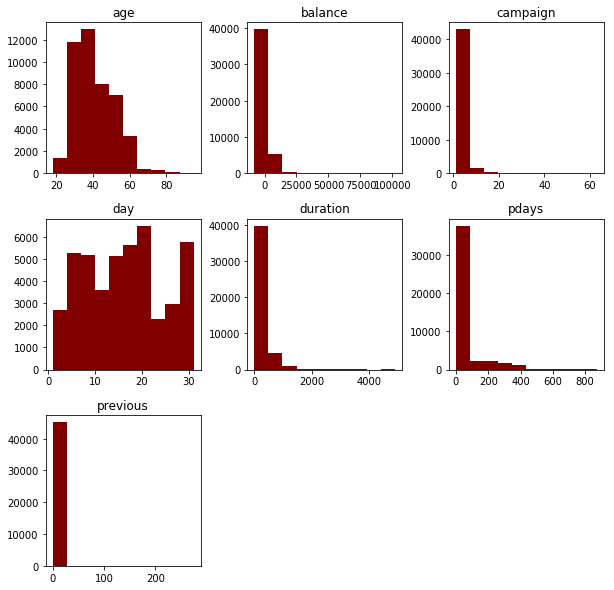

In [15]:
bank_df.hist(figsize=(10,10),color="maroon",grid=False)
plt.show()

# Plotting pairplot to check the distribution

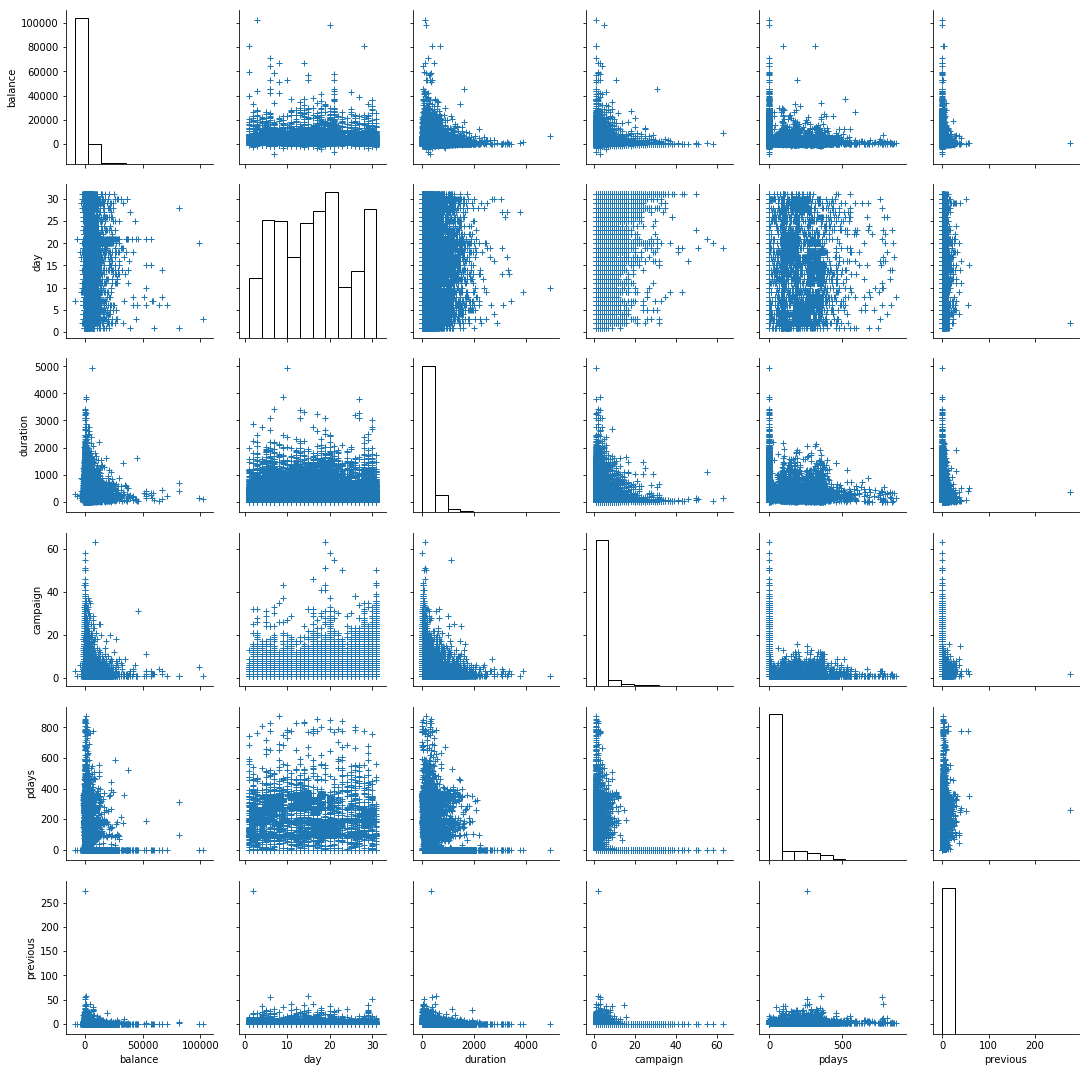

In [16]:
sns.pairplot(bank_df.iloc[:,1:],
             plot_kws=dict(marker="+", linewidth=1),
             diag_kws=dict(fill=False))

# E. EDA & Outliers

Just by looking at the graphical representation we cant conclude which attribute have the highest and lowest effect on the target variable

# i] Age

In [17]:
print('Minimum age: ', bank_df['age'].min())
print('Maximum age: ', bank_df['age'].max())

Minimum age:  18
Maximum age:  95


Text(0.5, 1.0, 'Age Distribution')

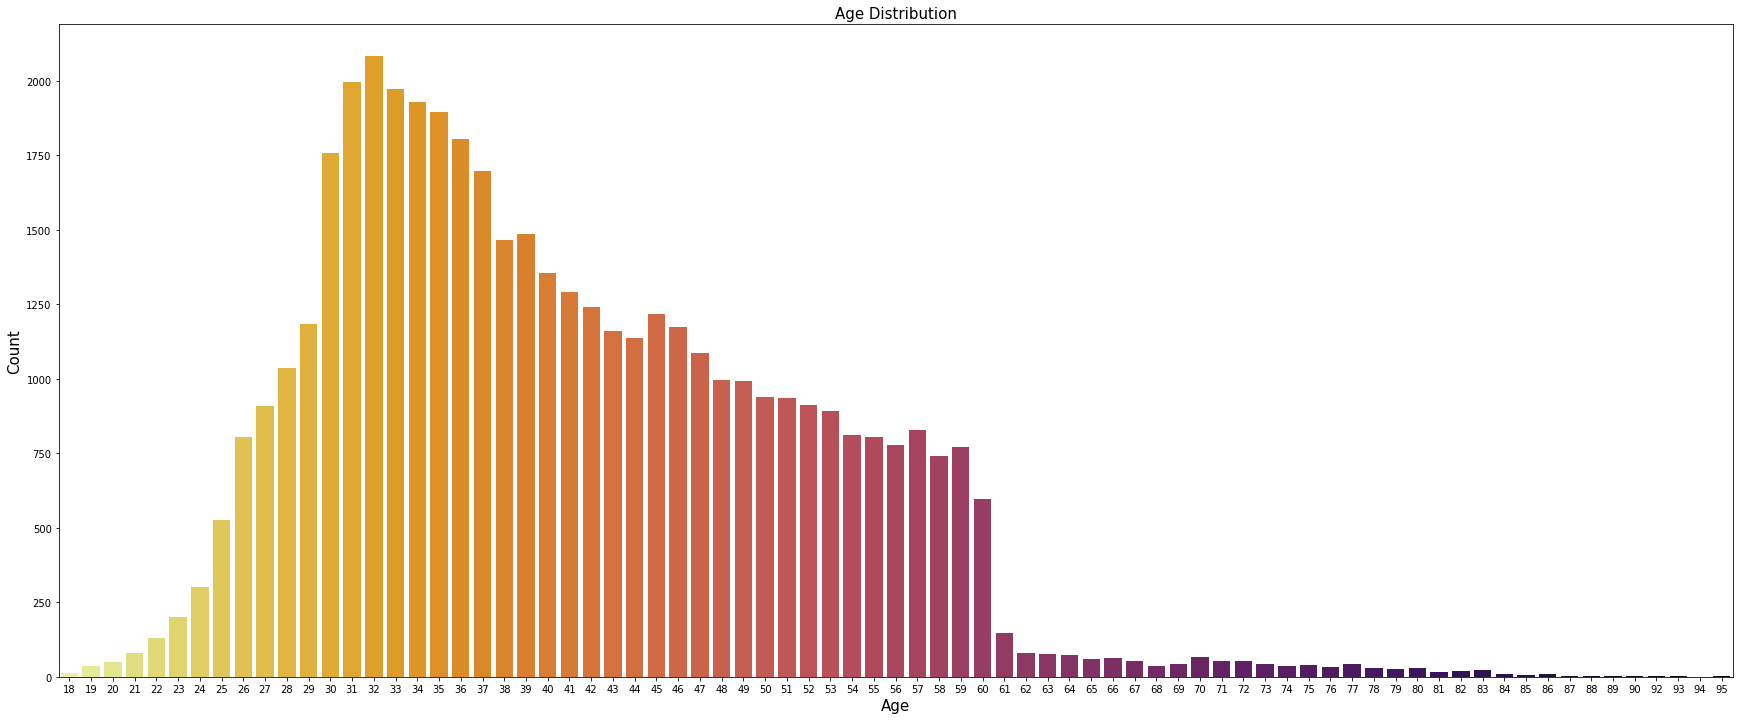

In [18]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'age',  palette="inferno_r", data = bank_df)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=15)

Text(0.5, 1.0, 'Age x Ocucurence')

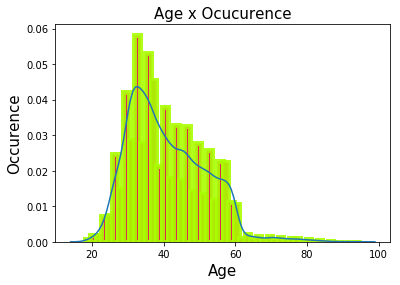

In [19]:

sns.distplot(bank_df['age'],
             hist_kws = {'color':'#DC143C', 'edgecolor':'#aaff00',
                       'linewidth':5, 'linestyle':'-', 'alpha':0.9})
plt.xlabel("Age", fontsize=15)
plt.ylabel('Occurence', fontsize=15)
plt.title('Age x Ocucurence', fontsize=15)

Text(0.5, 1.0, 'Age Distribution')

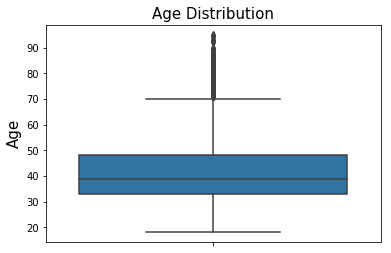

In [20]:
sns.boxplot(x = 'age', data = bank_df, orient = 'v')
plt.ylabel("Age", fontsize=15)
plt.title('Age Distribution', fontsize=15)

In [21]:
# Quartiles
print('1º Quartile: ', bank_df['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['age'].quantile(q = 1.00))

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0


In [22]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_df['age'].quantile(q = 0.75) + 
                      1.5*(bank_df['age'].quantile(q = 0.75) - bank_df['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  70.5 are outliers


In [23]:
print('Numerber of outliers: ', bank_df[bank_df['age'] > 70.5]['age'].count())
print('Number of clients: ', len(bank_df))
#Outliers in %
print('Outliers are:', round(bank_df[bank_df['age'] > 70.5]['age'].count()*100/len(bank_df),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


# ii] Job

Text(0.5, 1.0, 'Job Distribution')

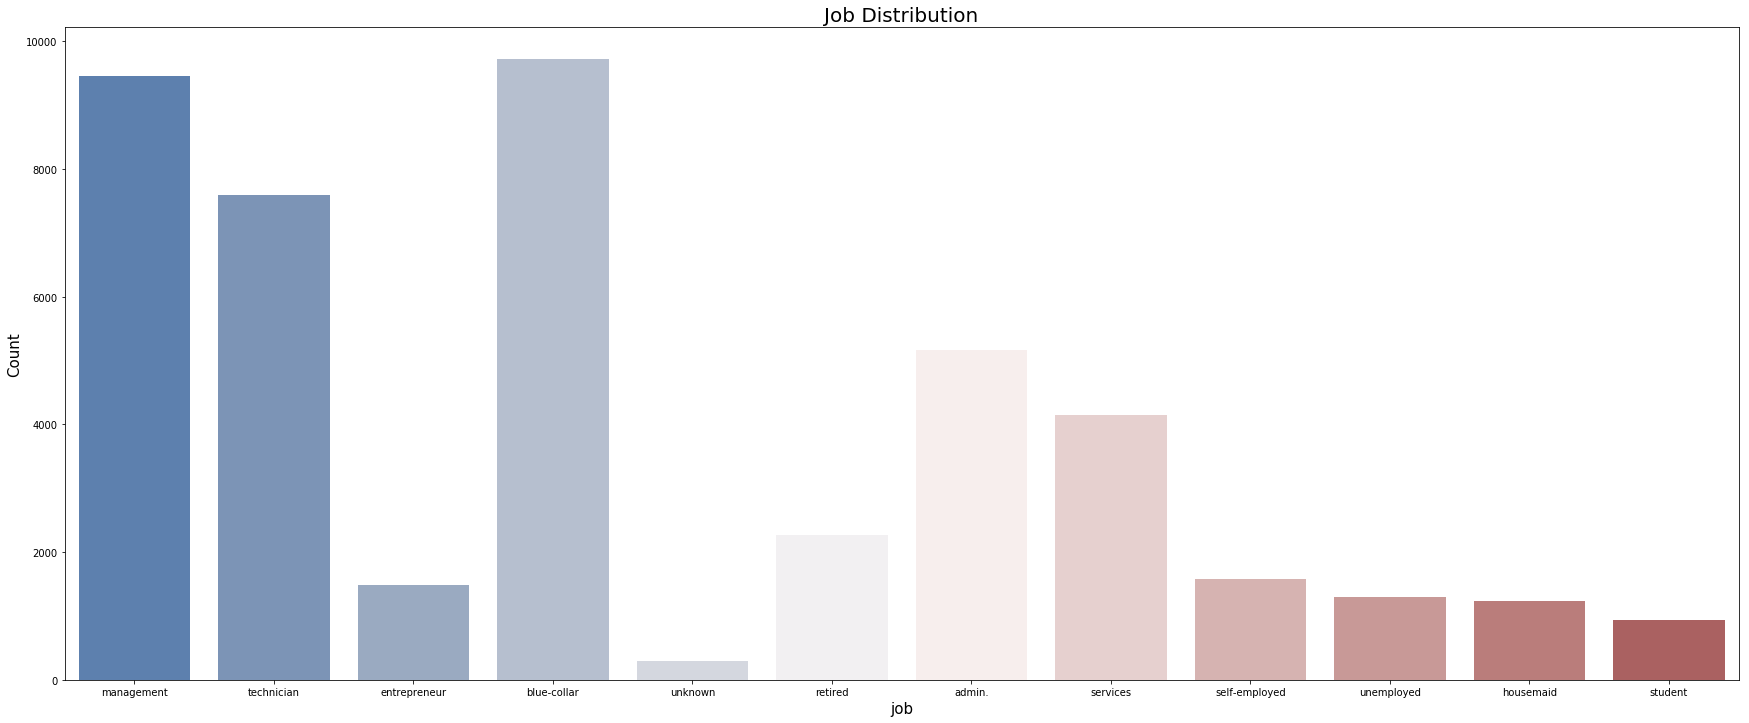

In [24]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = bank_df,palette="vlag")
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

Text(0.5, 1.0, 'Marital Distribution')

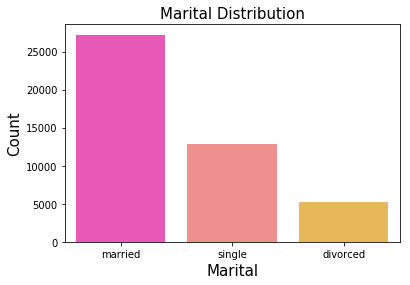

In [25]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'marital',data = bank_df,palette="spring")
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

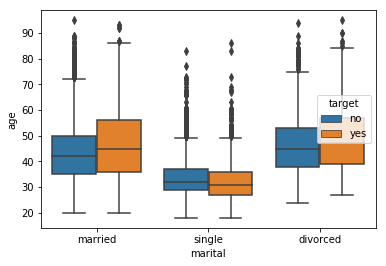

In [26]:
sns.boxplot(x='marital',y='age',hue='target',data=bank_df)

# iii] Default

Text(0.5, 1.0, 'Default Distribution')

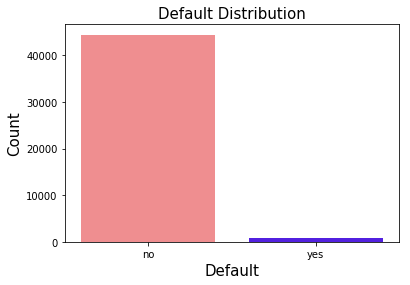

In [27]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = bank_df,palette="gnuplot2_r")
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

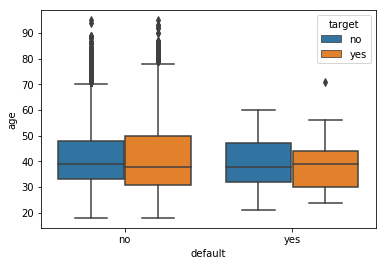

In [28]:
sns.boxplot(x='default',y='age',hue='target',data=bank_df)

In [29]:
print('Default:\n No credit in default:'     , bank_df[bank_df['default'] == 'no']     ['age'].count(),
              '\n Yes to credit in default:' , bank_df[bank_df['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 44396 
 Yes to credit in default: 815


# iv] Housing

Text(0.5, 1.0, 'Housing Distribution')

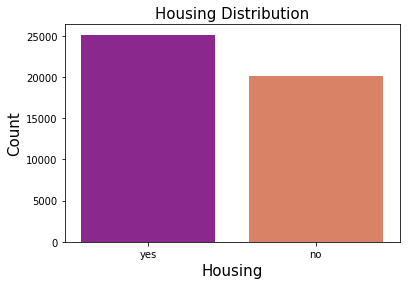

In [30]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = bank_df,palette="plasma")
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

In [31]:
print('Housing:\n No Housing:'  , bank_df[bank_df['housing'] == 'no']     ['age'].count(),
              '\n Yes Housing:' , bank_df[bank_df['housing'] == 'yes']    ['age'].count())

Housing:
 No Housing: 20081 
 Yes Housing: 25130


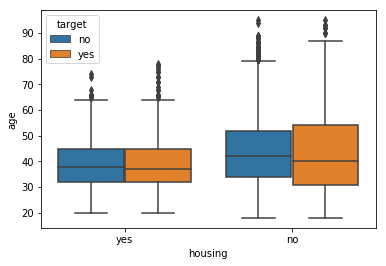

In [32]:
sns.boxplot(x='housing',y='age',hue='target',data=bank_df)

# v] Loan

Text(0.5, 1.0, 'Loan Distribution')

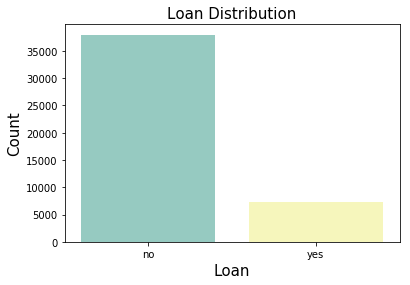

In [33]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'loan',data = bank_df,palette="Set3")
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [34]:
print('Loan:\n No Personal loan:', bank_df[bank_df['loan'] == 'no']     ['age'].count(),
      '\n Yes Personal Loan:' , bank_df[bank_df['loan'] == 'yes']    ['age'].count())

Loan:
 No Personal loan: 37967 
 Yes Personal Loan: 7244


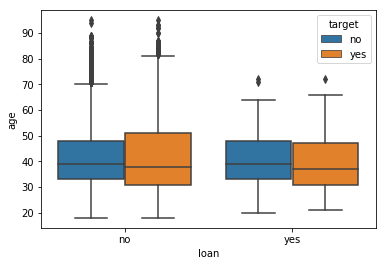

In [35]:
sns.boxplot(x='loan',y='age',hue='target',data=bank_df)

# vi] Contact

Text(0.5, 1.0, 'Contact Distribution')

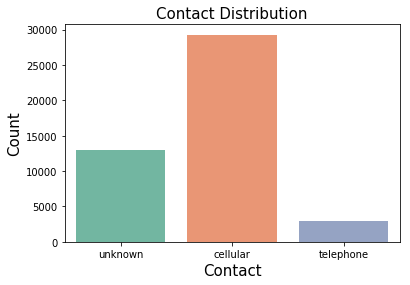

In [36]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'contact',data = bank_df,palette="Set2")
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

In [37]:
print('Contact:\n Unknown Contact:'     , bank_df[bank_df['contact'] == 'unknown']     ['age'].count(),
              '\n Cellular Contact:'   , bank_df[bank_df['contact'] == 'cellular']    ['age'].count(),
              '\n Telephone Contact:'  , bank_df[bank_df['contact'] == 'telephone']   ['age'].count())

Contact:
 Unknown Contact: 13020 
 Cellular Contact: 29285 
 Telephone Contact: 2906


# vii] Month

Text(0.5, 1.0, 'Monthly Distribution')

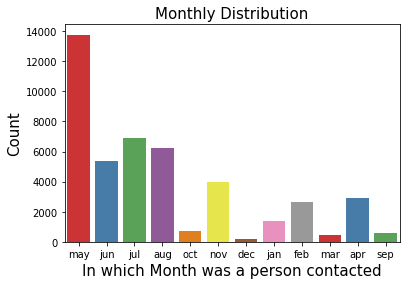

In [38]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = bank_df,palette="Set1")
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

# viii] Day

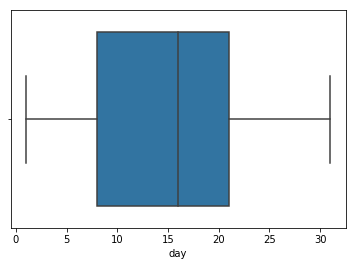

In [39]:
sns.boxplot(x=bank_df["day"])

# ix] Duration of call

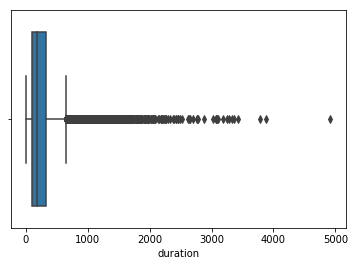

In [40]:
sns.boxplot(x=bank_df["duration"])

Text(0.5, 1.0, 'Duration distribution')

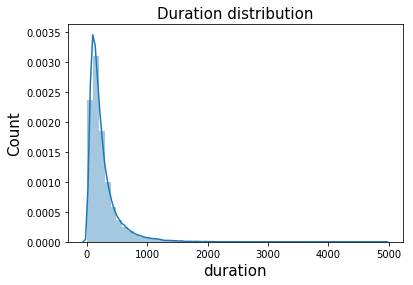

In [41]:
sns.distplot(bank_df['duration'])
plt.xlabel("duration", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Duration distribution', fontsize=15)

In [42]:
# Quartiles
print('1º Quartile: ', bank_df['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['duration'].quantile(q = 1.00))


1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0


In [43]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration above: ', bank_df['duration'].quantile(q = 0.75) + 
                      1.5*(bank_df['duration'].quantile(q = 0.75) - bank_df['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers


In [44]:
print('Numerber of outliers: ', bank_df[bank_df['duration'] > 643.0]['duration'].count())
print('Number of clients: ', len(bank_df))
#Outliers in %
print('Outliers are:', round(bank_df[bank_df['duration'] > 643.0]['duration'].count()*100/len(bank_df),2), '%')

Numerber of outliers:  3235
Number of clients:  45211
Outliers are: 7.16 %


In [45]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank_df[(bank_df['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [46]:
bank_df[bank_df['duration'] == 0]['duration'].count()

3

# x] Campaign

Text(0.5, 1.0, 'Campaign Distribution')

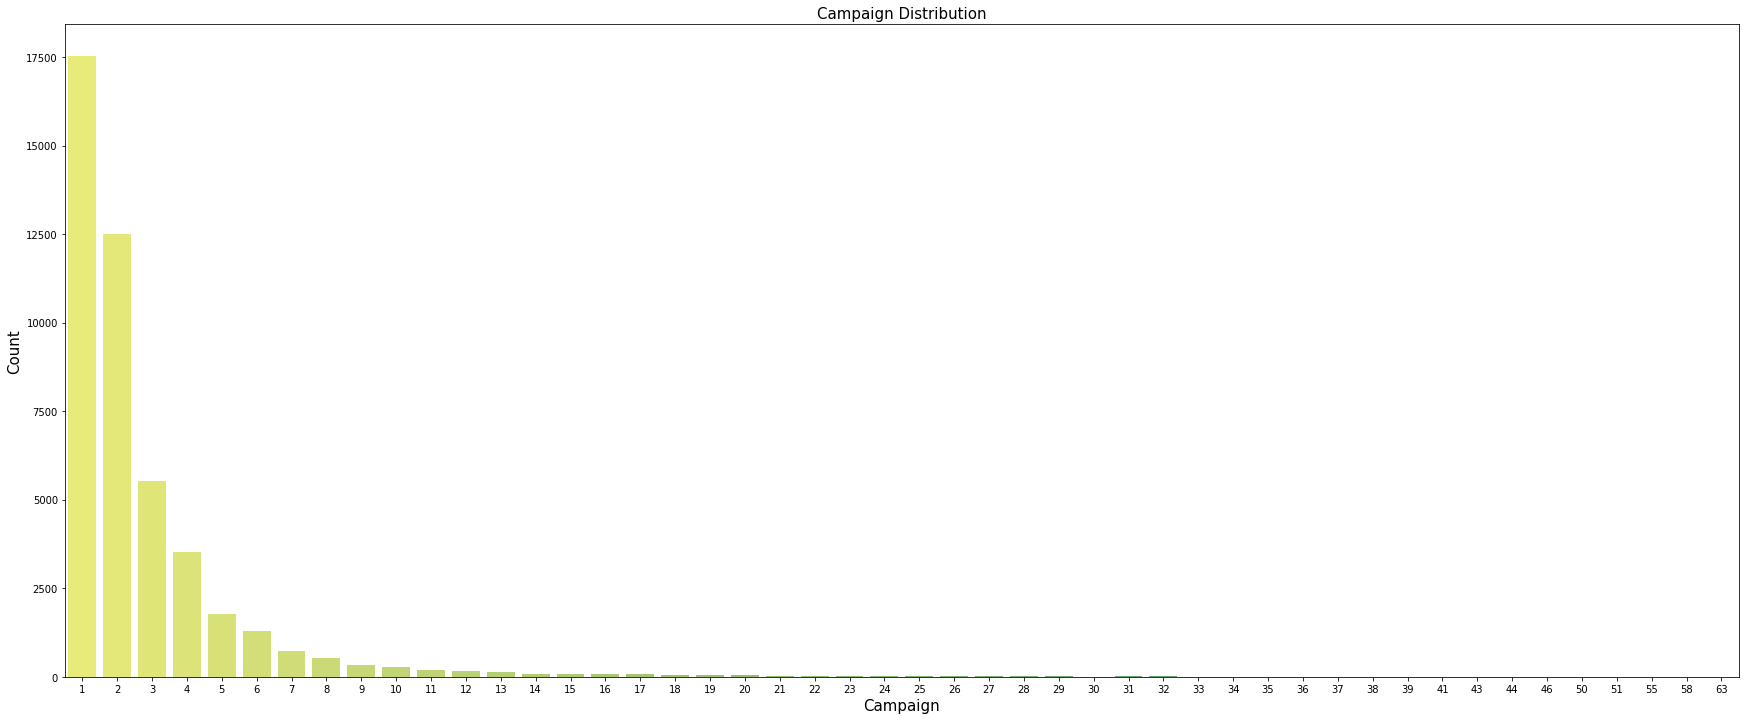

In [47]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'campaign', data = bank_df,palette="summer_r")
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Campaign Distribution')

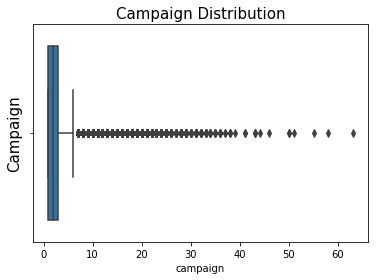

In [48]:
sns.boxplot(x = 'campaign', data = bank_df, orient = 'h')
plt.ylabel("Campaign", fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Campaign distribution')

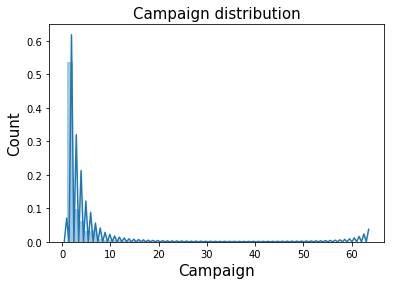

In [49]:
sns.distplot(bank_df['campaign'])
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign distribution', fontsize=15)

In [50]:
# Quartiles
print('1º Quartile: ', bank_df['campaign'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['campaign'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['campaign'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['campaign'].quantile(q = 1.00))

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0


In [51]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Campaign above: ', bank_df['campaign'].quantile(q = 0.75) + 
                      1.5*(bank_df['campaign'].quantile(q = 0.75) - bank_df['campaign'].quantile(q = 0.25)), 'are outliers')

Campaign above:  6.0 are outliers


In [52]:
print('Numerber of outliers: ', bank_df[bank_df['campaign'] > 6.0]['campaign'].count())
print('Number of clients: ', len(bank_df))
#Outliers in %
print('Outliers are:', round(bank_df[bank_df['campaign'] > 6.0]['campaign'].count()*100/len(bank_df),2), '%')

Numerber of outliers:  3064
Number of clients:  45211
Outliers are: 6.78 %


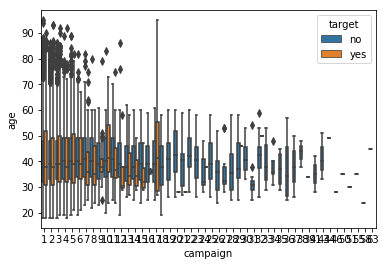

In [53]:
sns.boxplot(x='campaign',y='age',hue='target',data=bank_df)

# xi] pdays

Text(0.5, 1.0, 'pdays Distribution')

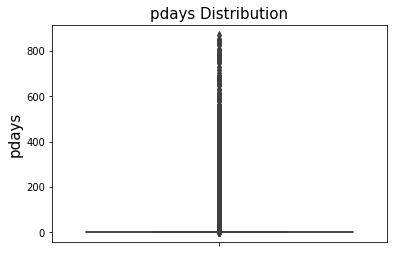

In [54]:
sns.boxplot(x = 'pdays', data = bank_df, orient = 'v')
plt.ylabel("pdays", fontsize=15)
plt.title('pdays Distribution', fontsize=15)

# xii] Previous

Text(0.5, 1.0, 'Previous')

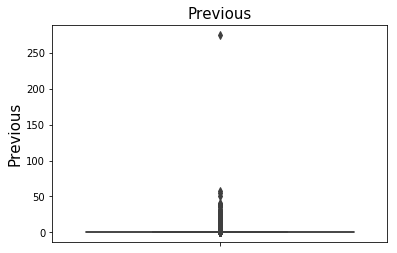

In [55]:
sns.boxplot(x = 'previous', data = bank_df, orient = 'v')
plt.ylabel("Previous", fontsize=15)
plt.title('Previous', fontsize=15)

# xiii] poutcome

Text(0.5, 1.0, 'Poutcome distribution')

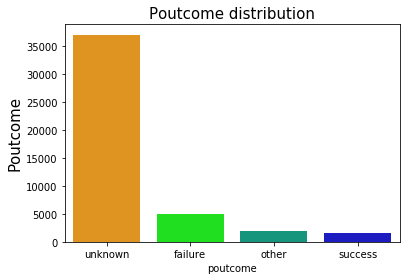

In [56]:
sns.countplot(x = 'poutcome', data = bank_df, orient = 'v',palette="nipy_spectral_r")
plt.ylabel("Poutcome", fontsize=15)
plt.title('Poutcome distribution', fontsize=15)

In [57]:
print('poutcome:\n Unknown poutcome:'     , bank_df[bank_df['poutcome'] == 'unknown']   ['age'].count(),
              '\n Failure in  poutcome:'  , bank_df[bank_df['poutcome'] == 'failure']   ['age'].count(),
              '\n Other poutcome:'        , bank_df[bank_df['poutcome'] == 'other']     ['age'].count(),
              '\n Success in poutcome:'   , bank_df[bank_df['poutcome'] == 'success']   ['age'].count())

poutcome:
 Unknown poutcome: 36959 
 Failure in  poutcome: 4901 
 Other poutcome: 1840 
 Success in poutcome: 1511


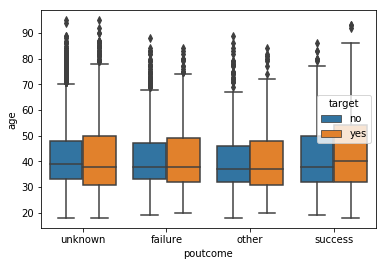

In [58]:
sns.boxplot(x='poutcome',y='age',hue='target',data=bank_df)

# xiv] target 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12E06B30>,
      dtype=object)

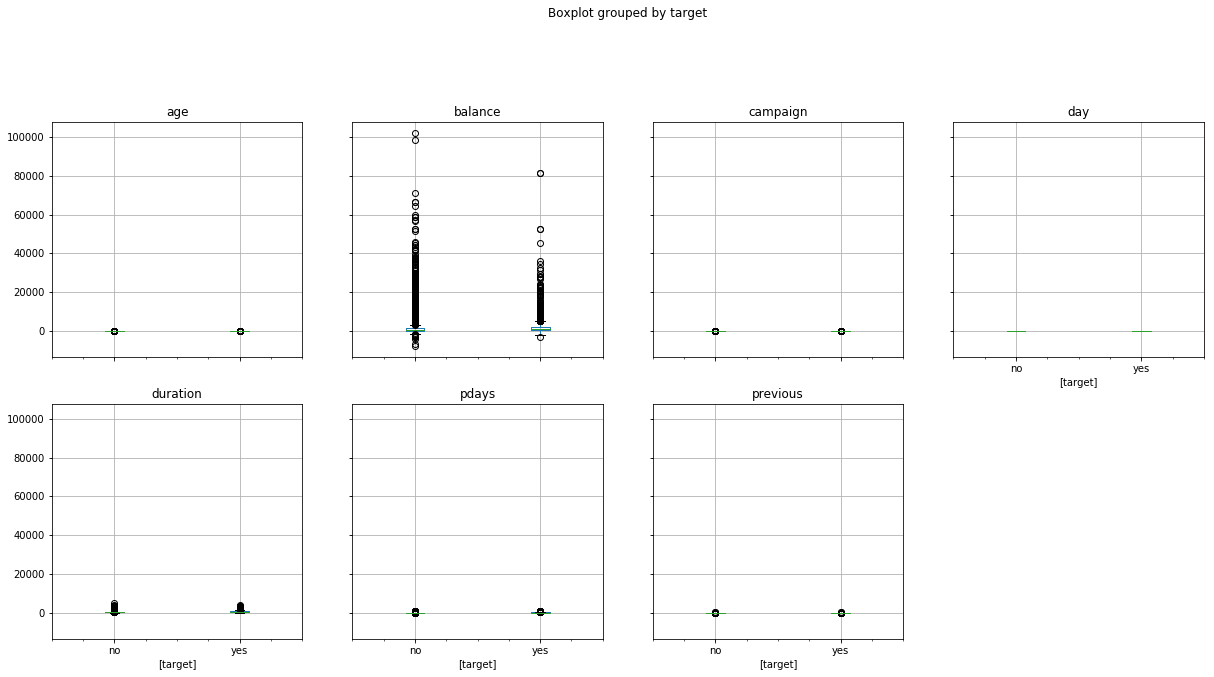

In [59]:
bank_df.boxplot(by = 'target',  layout=(4,4), figsize=(20, 20))

Text(0.5, 1.0, 'target distribution')

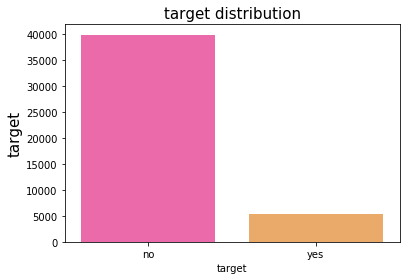

In [60]:
sns.countplot(x = 'target', data = bank_df, orient = 'v',palette="spring")
plt.ylabel("target", fontsize=15)
plt.title('target distribution', fontsize=15)

In [61]:
#Let us look at the target column which is "target"(yes/no).
bank_df.groupby(["target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


# Finding correlation

In [62]:
cor=bank_df.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


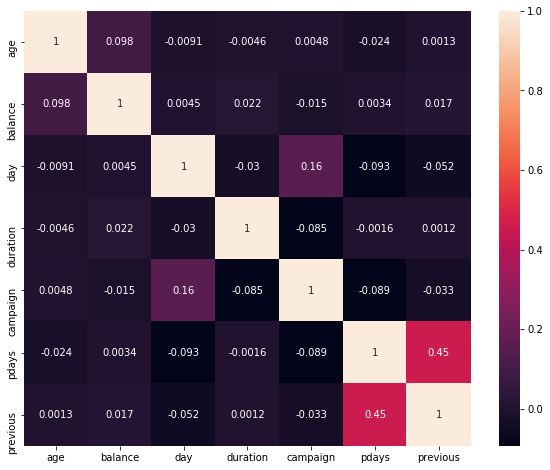

In [63]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

# Results of EDA

### 1.The ages are not that much important and dont make sense relate with other variables will not tell any insight.Just looking at the graphs we cannot conclude if age have a high effect to our target variable.
### 2.Here we can see the percentage of the outliers for 'Age' is less, so we can fit the model with and without them.
### 3.If we consider the Job attribute we can see the count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.
### 4.Married people are more ,we can see in graph clearly.
### 5.The clients having secondary education are more .And the clients having unknown eduction are less .
### 6.The clients having bydefault credit are less than those who don't have bydefault credit.
### 7.The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.
### 8.The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.
### 9.The count of a clients who can be contacted by Cellular is high that the others.
### 10.The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.
### 11.Most of the contacts are done in between 8th-21st day of the particular month.And Also there is no outlier present.
### 12.Just looking at the graphs we cannot conclude if duration have a high effect to our target variable.Here we can see the percentage of the outliers is less.But count is high means 643 count is not less I think so.
### 13.The percentage of presence of outlier is less as we can see.So we can fit the model with or without this attribute.
### 14.The success of the previous marketing campaign is not noticeable as we can see in graph.But still I am not sure as there are so many unknown options present.
### 15.I think for the Jobs, Marital and Education  the best analisys is just the count of each variable, if we related with the other ones its is not conclusive.
### 16.The Mareied people are more subscribing a term deposit. But here is also 50 percente chances to suscribe by clients as we can see in graphs.
### 17.here are outliers present in each education criteria . But the clients having primary education are more who have subscribed a term deposit.
### 18.The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances.

#  Mapping the data

In [64]:
bank_df['default'] = bank_df['default'].map({'yes':1 ,'no':0}) 
bank_df['housing'] = bank_df['housing'].map({'yes':1 ,'no':0}) 
bank_df['loan']    = bank_df['loan'].map({'yes':1 ,'no':0}) 
bank_df['target']  = bank_df['target'].map({'yes':1 ,'no':0}) 

# G. Splitting the data for training and testing

In [65]:
bank_df = bank_df.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,target
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [66]:
y = bank_df.target.values
x_data = bank_df.drop(['target'], axis = 1)

In [67]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [69]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T


In [70]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [71]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [72]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [73]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [74]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

# sklearn LogisticRegression

In [75]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.81%


# K-Nearest-Neighbour

In [76]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} KNN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 KNN Score: 88.37%


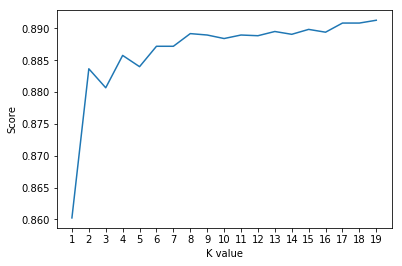

Maximum KNN Score is 89.13%


In [77]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# Support Vector Machine

In [78]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.25%


# Naive Bayes

In [79]:
#Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.44%


# Random Forest

In [80]:
#Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.58%


# Model Comparison

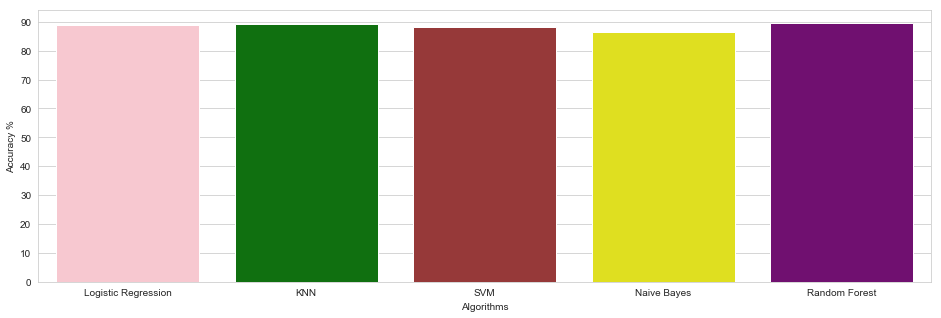

In [81]:
#Comparing Models
colors = ["Pink", "green", "brown", "yellow","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrix

In [82]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [83]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rf = confusion_matrix(y_test,y_head_rf)

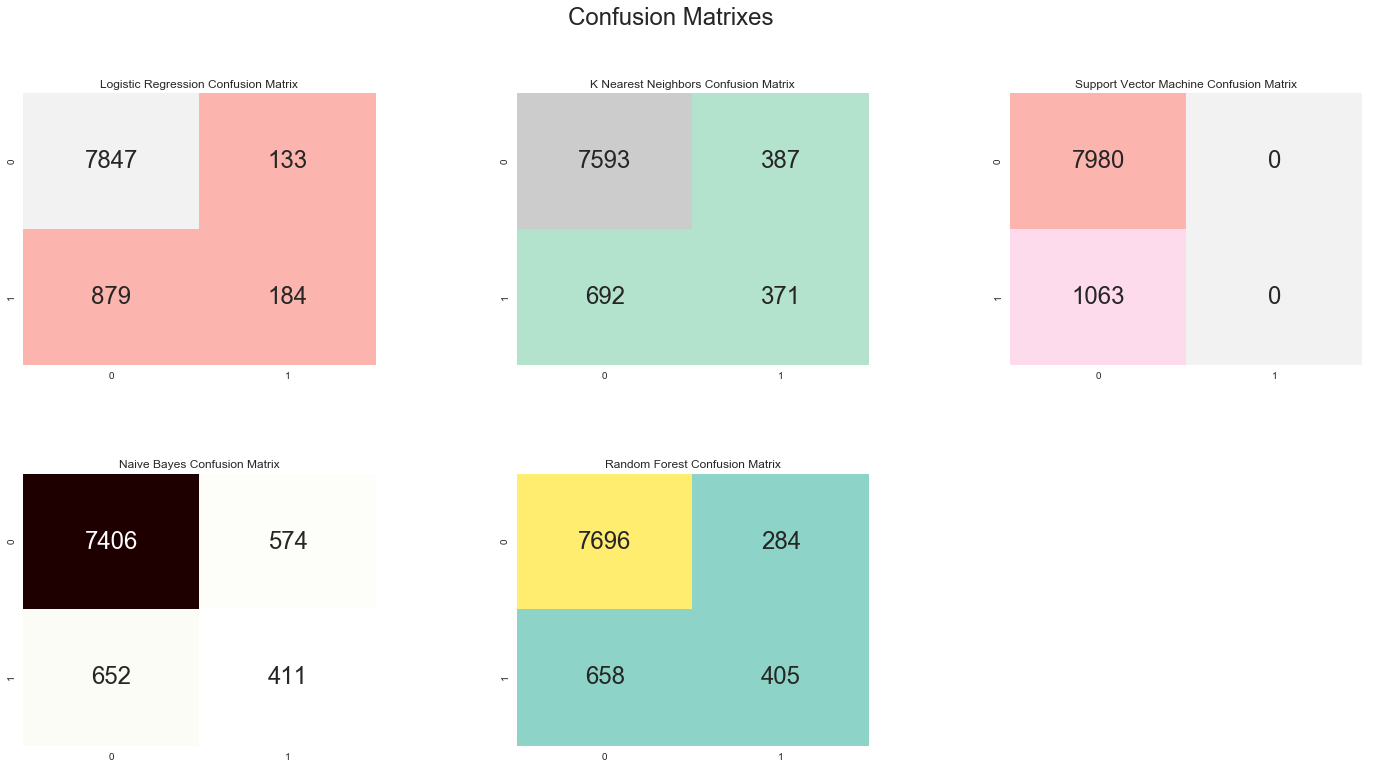

In [84]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Pastel1",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Pastel2",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Pastel1_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="pink_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Set3",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## 1.The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable target(y)).
## 2.A bank wants to know whether clients will subscribe a term deposit or not; so that they need information about the correlation between the variables given in the dataset.
## 3.Here I used 7 classification models to study.
## 4.From the accuracy scores , it seems like "Random Forest" algorithm have the highest accuracy and stability.
## 5.But we can use "KNN" also as it has a good accuracy and stability as well than other models.